In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import math
import seaborn as sns
from scipy import signal
from scipy.ndimage import gaussian_filter
from matplotlib.colors import LogNorm, Normalize
import random
from queue import Queue
import skimage

In [2]:
def make_gauss_kernel_1d(extra_size, sigma):
    center = (int)(np.max([1.0, extra_size*sigma])) # avoid visible truncation error
    h = np.zeros(2*center+1).astype(float)
    variance = sigma ** 2
    for i in range(h.shape[0]):
        r = center - i
        h[i] = math.exp(-0.5*(r*r)/(variance))
    return h

In [3]:
def make_gauss_kernel_2d(extra_size, sd):
    gaussian_1d_a = np.expand_dims(make_gauss_kernel_1d(extra_size, sd), axis=1)
    gaussian_1d_b = np.expand_dims(make_gauss_kernel_1d(extra_size, sd), axis=1)
    gaussian_2d = gaussian_1d_a @ gaussian_1d_b.T
    sum_2d = np.sum(gaussian_2d)
    return gaussian_2d/sum_2d

In [4]:
gaussian_2d = make_gauss_kernel_2d(5/3, 3)
print(gaussian_2d.shape)

(11, 11)


<AxesSubplot:>

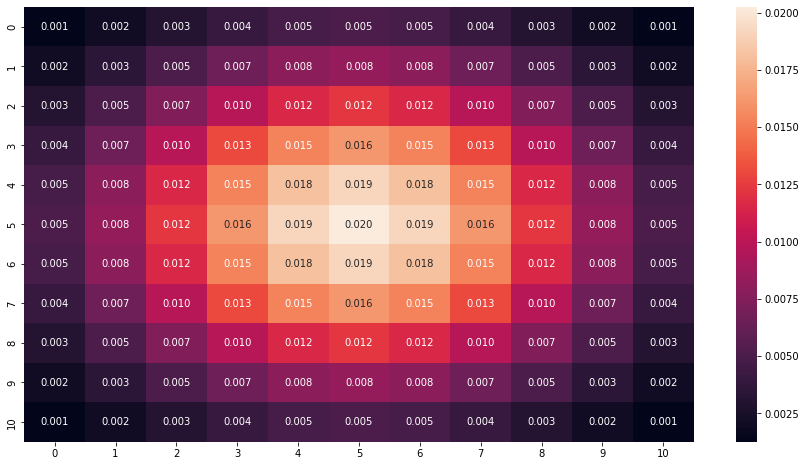

In [5]:
plt.figure(figsize = (15,8))
sns.heatmap(gaussian_2d, annot=True, fmt='.3f')

In [6]:
def adaptive_threshold_gaussian(img, r, k, d, bg):
    (height, width) = img.shape
    cnt = 1
    threshold_matrix = np.zeros_like(img)
    a = np.copy(img).astype(int)
    b = np.power(np.copy(img).astype(int),2)
    kernel = make_gauss_kernel_2d(3.5, 0.6*r)
    a = signal.convolve2d(a, kernel, mode="same")
    b = signal.convolve2d(b, kernel, mode="same")
    for row in range(height):
        for col in range(width):
            mean_local = a[row, col]
            sd_local = np.sqrt(b[row, col]-a[row, col]**2)
            if bg == 0: # if background is dark
                threshold_matrix[row,col] = mean_local + (k*sd_local+d)
            elif bg == 1: # if background is white
                threshold_matrix[row,col] = mean_local - (k*sd_local+d)
            print(cnt)
            cnt += 1
    return threshold_matrix

In [7]:
def processed_img(img, threshold_matrix):
    (height, width) = img.shape
    new_img = np.zeros_like(img)
    for col in range(height):
        for row in range(width):
            new_img[row, col] = 255 if img[row,col]>threshold_matrix[row,col] else 0
    return new_img

In [8]:
img_link = r"D:\image_processing_practice\DIP_Java\imagingbook_images_de3\ch11\stained-document-uneven.png"

In [9]:
img = plt.imread(img_link)
(height, width) = img.shape
print(height, width)

400 400


In [10]:
img = (img*255).astype(np.uint8)

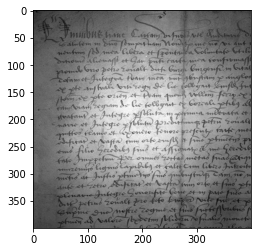

In [11]:
plt.imshow(img, cmap="gray")
plt.show()

In [ ]:
thresh_mat = adaptive_threshold_gaussian(img, r=15, k=0.3, d=5, bg=1)

In [13]:
new_img = processed_img(img, thresh_mat)

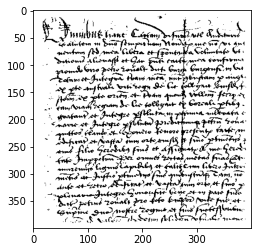

In [14]:
plt.imshow(new_img, cmap="gray")
plt.show()

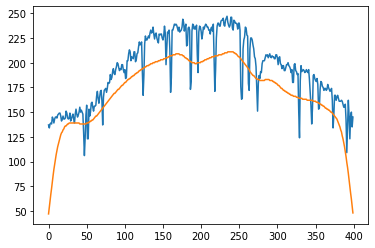

In [15]:
plt.plot(img[200,])
plt.plot(thresh_mat[200,])
plt.show()